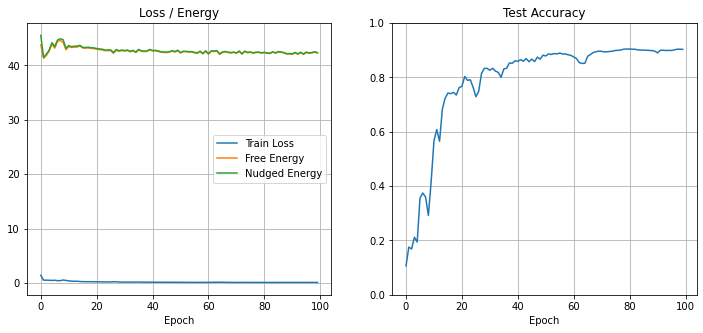

Model trained and saved locally at: ebm_full.pt


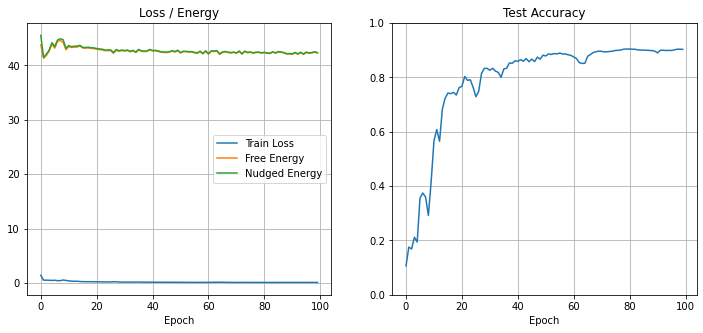

In [2]:
MODEL_PATH = "ebm_full.pt"  # Will save in /content by default in Colab
from multi_layer import EnergyBasedModel
import torch
# try:
    
#     model = EnergyBasedModel.load_from_file(MODEL_PATH)
#     print("Loaded pretrained model from local disk.")

# except Exception as e:
# print(f"Could not load model: {e}")
# print("Training a new model...")

model = EnergyBasedModel.train_model(
    subset_size=10000,
    epochs=100,
    hidden_dim=64,
    lr_ih=0.6,
    lr_ho=0.6,
    lr_b=0.6,
    n_free=20,
    n_nudge=2,
    dt=1,
    beta=0.8,
)

# model.save_to_file(MODEL_PATH)
print(f"Model trained and saved locally at: {MODEL_PATH}")




In [ ]:
# Check if the model object exists and inspect its properties
if 'model' in locals() or 'model' in globals():
    print(f"Model exists, type: {type(model)}")
    print(f"Model architecture: {model.weights if hasattr(model, 'weights') else 'Architecture info not available'}")
    print(f"Free energy iterations: {model.n_free}")
    print(f"Device: {model.device}")
else:
    print("Model variable not found. Check previous cell execution.")
    
# Inspect the data
print(f"\nTest data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"First 5 test labels: {y_test[:5]}")

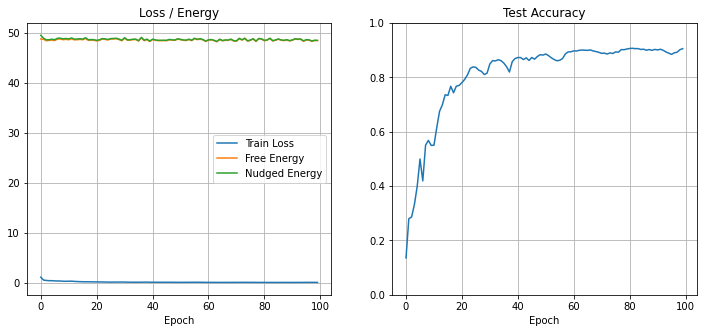

Model trained and saved locally at: ebm_full.pt
Test Accuracy: 90.55%



/home/likhith/Documents/energy-based-models/sadie_multi_layer_ebm/multi_layer.py:204: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true_t = torch.tensor(y_true[:len(preds)], device=self.device)


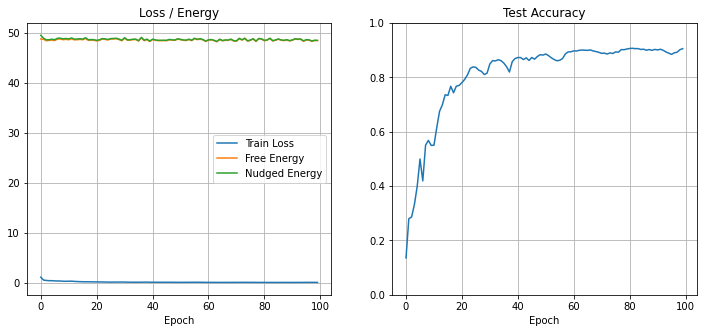

In [ ]:
from multi_layer import EnergyBasedModel
from model import load_mnist
import torch

MODEL_PATH = "ebm_full.pt"  # Will save in /content by default in Colab

# Load test set for final evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
(_, _, _), (X_test, y_test_1hot, y_test) = load_mnist()
X_test = torch.tensor(X_test).to(device)
y_test = torch.tensor(y_test).to(device)

try:
    raise FileNotFoundError  # Uncomment this line to force training a new model
    print("Loaded pretrained model from local disk.")

except Exception as e:
    print(f"Could not load model: {e}")
    print("Training a new model...")

    model = EnergyBasedModel.train_model(
        subset_size=10000,
        epochs=100,
        hidden_dim=64,
        lr_ih=0.6,
        lr_ho=0.6,
        lr_b=0.6,
        n_free=20,
        n_nudge=2,
        dt=1,
        beta=0.8,
    )

    #model.save_to_file(MODEL_PATH)
    print(f"Model trained and saved locally at: {MODEL_PATH}")


# Always evaluate
acc = model.evaluate(X_test, y_test, n_iter=model.n_free)
print(f"Test Accuracy: {acc:.2%}")
print()


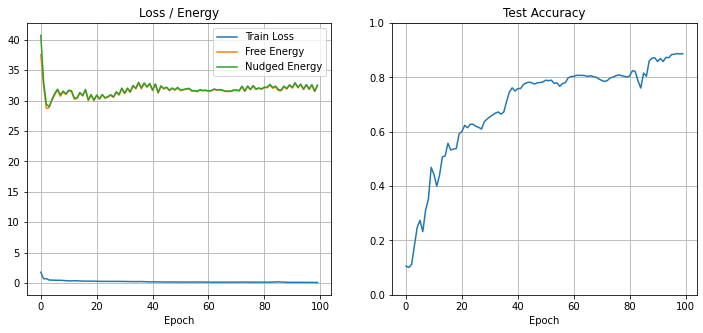

EBM saved to ebm_full.pt
Model trained and saved locally at: ebm_full.pt
Test Accuracy: 88.71%



/home/likhith/Documents/energy-based-models/sadie_multi_layer_ebm/model.py:193: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true_t = torch.tensor(y_true[:len(preds)], device=self.device)


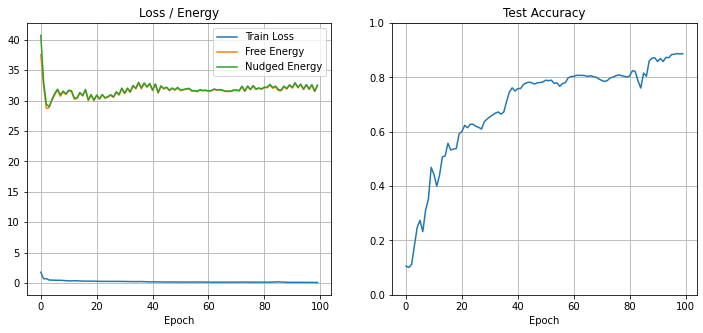

In [ ]:
from model import EnergyBasedModel
from model import load_mnist
import torch

MODEL_PATH = "ebm_full.pt"  # Will save in /content by default in Colab

# Load test set for final evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
(_, _, _), (X_test, y_test_1hot, y_test) = load_mnist()
X_test = torch.tensor(X_test).to(device)
y_test = torch.tensor(y_test).to(device)

try:
    model = EnergyBasedModel.load_from_file(MODEL_PATH)
    print("Loaded pretrained model from local disk.")

except Exception as e:
    print(f"Could not load model: {e}")
    print("Training a new model...")

    model = EnergyBasedModel.train_model(
        subset_size=10000,
        epochs=100,
        hidden_dim=64,
        lr_ih=0.6,
        lr_ho=0.6,
        lr_b=0.6,
        n_free=20,
        n_nudge=2,
        dt=1,
        beta=0.8,
    )

    model.save_to_file(MODEL_PATH)
    print(f"Model trained and saved locally at: {MODEL_PATH}")


# Always evaluate
acc = model.evaluate(X_test, y_test, n_iter=model.n_free)
print(f"Test Accuracy: {acc:.2%}")
print()
